In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


***Description of Variables***
```The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman&#39;s age
yrs_married: number of years married
children: number of children
religious: woman&#39;s rating of how religious she is (1 = not religious, 4 =strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
occupation: woman&#39;s occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = &quot;white collar&quot;, 
4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband&#39;s occupation (same coding as above)
affairs: time spent in extra-marital affairs```

In [3]:
# add 'affair' column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type='dataframe')
X = X.rename(columns =
            {'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3',
            'C(occupation)[T.4.0]':'occ_4',
            'C(occupation)[T.5.0]':'occ_5',
            'C(occupation)[T.6.0]':'occ_6',
            'C(occupation_husb)[T.2.0]':'occ_husb_2',
            'C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4',
            'C(occupation_husb)[T.5.0]':'occ_husb_5',
            'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [4]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [5]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [6]:
print(dta[dta['affair']==0].shape)
print(dta[dta['affair']==1].shape)

(4313, 10)
(2053, 10)


In [7]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [8]:
X = dta.drop('affair', axis=1)
y = dta['affair']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [10]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Method #1 - Train a Logistic Regression Model and evaluating the accuracy
log_reg = LogisticRegression()
grid_search = {'C': 10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)
clf = GridSearchCV(log_reg, param_grid = grid_search, cv=cv, n_jobs=-1, scoring='f1_macro')

In [13]:
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [14]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print(clf.best_params_)

[[849   0]
 [  1 424]]
0.9992150706436421
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1274
   macro avg       1.00      1.00      1.00      1274
weighted avg       1.00      1.00      1.00      1274

{'C': 100.0, 'penalty': 'l2'}


In [15]:
y_train.value_counts() #The ratio of 0 and 1 in y_train is 1:3

0    3464
1    1628
Name: affair, dtype: int64

In [16]:
1628*3

4884

In [17]:
#Method #2 - Increasing the class_weight of 1 to match 0 and training a Logistic Regression model
class_weight = {0: 1, 1: 3}
log_reg = LogisticRegression(class_weight=class_weight)
grid_search = {'C': 10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)
clf = GridSearchCV(log_reg, param_grid = grid_search, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print(clf.best_params_)

[[849   0]
 [  0 425]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1274
   macro avg       1.00      1.00      1.00      1274
weighted avg       1.00      1.00      1.00      1274

{'C': 100.0, 'penalty': 'l2'}


In [18]:
y_train.value_counts()

0    3464
1    1628
Name: affair, dtype: int64

There is not much difference in Method1 and Method2. Moreover, in Method2 overfitting is happening if the class weight is balanced using class_weight parameter in Logistic Regression.
<br> Let us try with over sampling to balance the data and then train the model. PS: Since the data is not so huge, under sampling is not recommended for this dataset.

In [19]:
from collections import Counter
Counter(y_train)

Counter({1: 1628, 0: 3464})

In [21]:
#Oversampling
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
print(f"Before over sampling: {Counter(y_train)}")
print(f"After over sampling: {Counter(y_train_ros)}")

Before over sampling: Counter({0: 3464, 1: 1628})
After over sampling: Counter({1: 3464, 0: 3464})


In [23]:
log_reg = LogisticRegression()
grid_search = {'C': 10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)
clf = GridSearchCV(log_reg, param_grid = grid_search, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train_ros, y_train_ros)
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print(clf.best_params_)

[[849   0]
 [  0 425]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1274
   macro avg       1.00      1.00      1.00      1274
weighted avg       1.00      1.00      1.00      1274

{'C': 100.0, 'penalty': 'l2'}


<AxesSubplot:xlabel='affair', ylabel='count'>

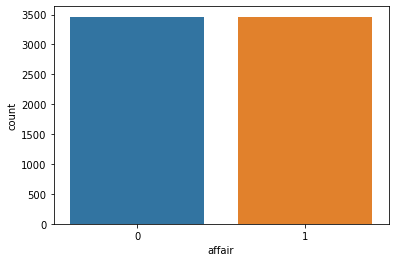

In [25]:
import seaborn as sns
sns.countplot(y_train_ros)

In [26]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

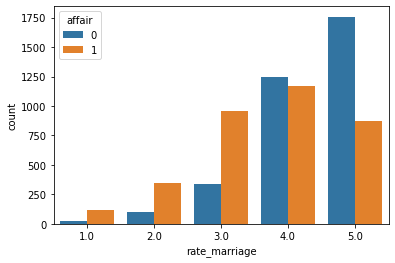

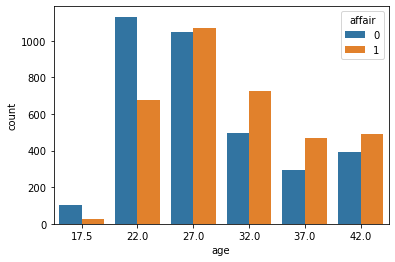

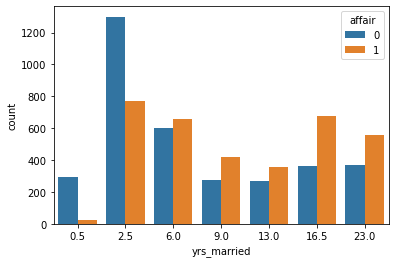

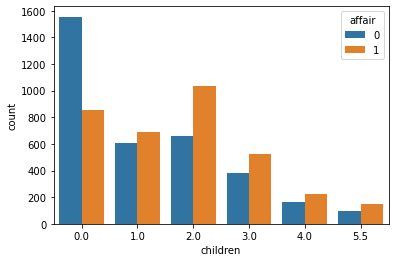

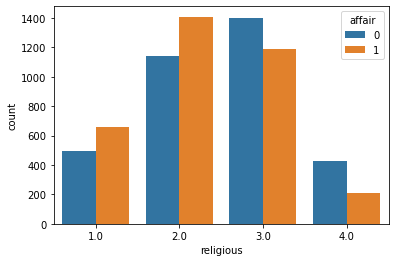

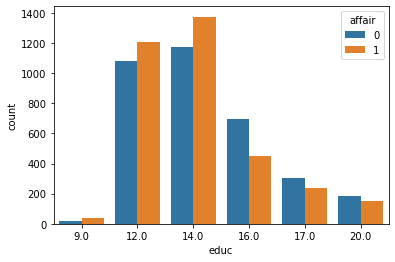

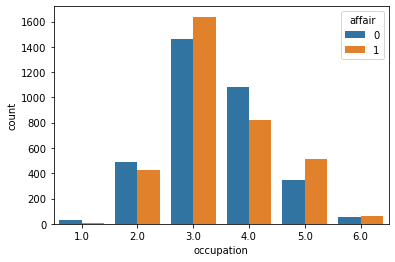

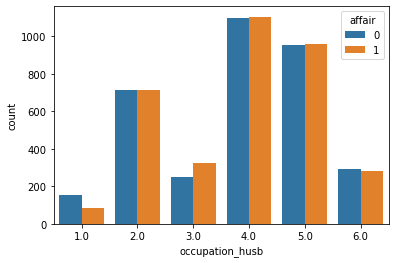

In [27]:
for column in X_train_ros.columns[:-1]:
    fig, ax = plt.subplots()
    ax = sns.countplot(X_train_ros[column], hue=y_train_ros)

After over sampling the data (affair = 1), it is observed that 
<br> - women who gave highest rating for marriage, least yrs of marriage, with no children have more chances on zero extra affairs
<br> - women who are moderately religious, moderately paid, husband moderately paid have 50/50 chances of having extra affairs

In [28]:
import pickle

In [29]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [30]:
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict([[5,75,6,14,75,21,16,9,70]]))

[1]
